# 1.4 Introduction Linear Regression #

A regression model is a statistical model of the influence of random variables on a certain random variable. If we assume that they follow a simple linear relationship, of the form:

$$
Y = \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_k X_k,
$$

then this is a linear regression model. In this case, there are $k$ *independent variables*. They are alternatively called *explanatory variables*. Sometimes, they are constants, and then they are called *constant terms*. The coefficients $\beta_i$ are the parameters of the model that have to be estimated using data.

#### Simplest Linear Model ####

The simplest cast of a linear model is $Y = \alpha + \beta X$. We will work with some data from Yahoo! Finance subsequently.

For such a simple model, using a scatter plot can aid in visualization.

In [2]:
#!pip install yfinance
#!pip install yahoofinancials
#!pip install pandas
import pandas as pd
import yfinance as yf
import numpy as np
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
from scipy.stats import linregress
pd.options.mode.chained_assignment = None 



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


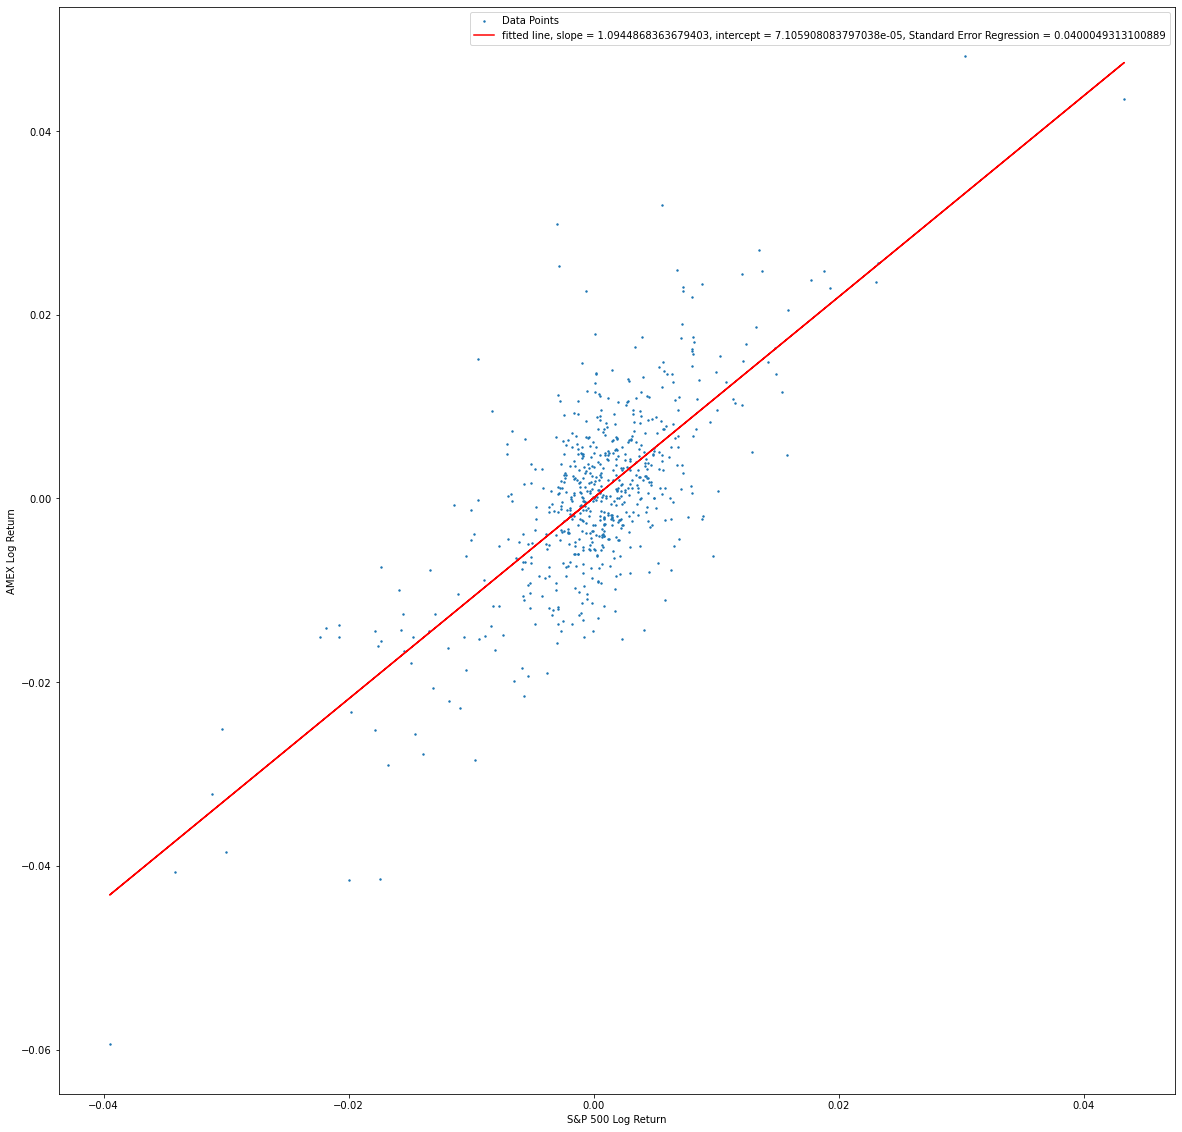

In [12]:
startdate = '2016-11-10' #Only take data after this date
enddate = '2019-05-26' #Only take data before this date

# Download AMEX data, S&P 500 Data

amex_data = yf.download('AXP')
datestotakestart = amex_data.index>startdate
datestotakeend = amex_data.index<enddate
amex_data = amex_data[np.logical_and.reduce([datestotakestart,datestotakeend])]
# print(amex_data)
amex_data["Log Return"] = np.log(amex_data["Close"]/amex_data["Open"])
amex_log_returns = amex_data[["Log Return"]].to_numpy()

SnP_data = yf.download('^GSPC')
datestotakestart = SnP_data.index>startdate
datestotakeend = SnP_data.index<enddate
SnP_data = SnP_data[np.logical_and.reduce([datestotakestart,datestotakeend])]
SnP_data["Log Return"] = np.log(SnP_data["Close"]/SnP_data["Open"])
SnP_log_returns = SnP_data[["Log Return"]].to_numpy()
# print(SnP_log_returns.shape)
# Linear Regression
# print(np.transpose(SnP_log_returns)[0])
res = linregress(np.transpose(SnP_log_returns)[0], np.transpose(amex_log_returns)[0])
# Plotting Scatterplot
plt.figure(figsize=(20, 20))
plt.scatter(SnP_log_returns,amex_log_returns,s=2,label='Data Points')
plt.plot(SnP_log_returns, res.intercept + res.slope*SnP_log_returns, 'r', label='fitted line, slope = %s, intercept = %s, Standard Error Regression = %s'%(res.slope,res.intercept,res.stderr))
plt.legend()
plt.xlabel('S&P 500 Log Return')
plt.ylabel('AMEX Log Return')

plt.show()

Usually, the points will not lie exactly along the linear regression line, unless they are perfectly correlated. One can include an error term in the simple linear model

$$
Y_t = \alpha + \beta X_t + \epsilon_t.
$$

$\epsilon_t$ is called the *error process*. For low correlation between $X$ and $Y$, the error process will have a relatively high variance, and similarly, a high correlation will imply that the error process has a low variance. 

We now need to introduce more notation. We adopt the hat notation $\hat{}$ to denote estimators. Then, the fitted line is denoted as

$$
\hat{Y} = \hat{\alpha} + \hat{\beta} X.
$$

The difference between $Y$ and $\hat{Y}$ is known as the *residual*, $e_t = Y_t - \hat{Y}_t$. Then, $Y_t = \hat{\alpha} + \hat{\beta}X_t + e_t$. This is the estimated model. We can regard the residuals as observations on the error process $\epsilon_t$. By testing the properties of the residuals, we can test assumptions about the behavior of the error process. The residuals will depend on the estimated parameters of the linear regression.



#### Ordinary Least Squares ####

It remains to choose a way to estimate the parameters that minimizes the residuals. Just minimizing the sum of residuals will not work as positive and negative values will cancel each other out. The simplest way to estimate them, which has nice mathematical properties, is to minimize the variance of the residuals, or put another way, to minimize the sum of the squared residuals. This is called the *ordinary least squares* optimization criterion. We denote $RSS$:

$$
RSS = \sum_t e_t^2 = \sum_t (Y_t - (\alpha + \beta X_t))^2.
$$

Then the OLS estimators $\hat{\alpha}, \hat{\beta}$ are found by solving the optimization problem

$$
\min_{\alpha,\beta} RSS,
$$

which is known as the OLS criterion. If we differentiate them with respect to $\alpha$ and $\beta$ and set the derivatives to zero, we get:

$$
\hat{\beta} = \frac{\sum_t (X_t - \bar{X})(Y_t - \bar{Y})}{\sum_t (X_t - \bar{X})^2},
$$

where $\bar{X}$ and $\bar{Y}$ denote the means of $X$ and $Y$.

As a way to generalize this, if we consider a matrix-vector formulation:

$$
\sum_j X_{ij} \beta_j = Y_i\\
= \textbf{X} \vec{\beta} = \vec{Y},
$$

then,

$$
RSS(\vec{\beta}) = (\vec{Y} - \textbf{X} \vec{\beta})^T (\vec{Y} - \textbf{X} \vec{\beta}),\\
\hat{\vec{\beta}} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \vec{Y}.
$$

Going back to the simple linear regression model, we note that the estimate of beta is the ratio of the sample variance to the sample covariance:

$$
\hat{\beta} = \text{est.} Cov(X,Y) / \text{est.} V(X).
$$

Since the covariance if the product of the correlation, standard deviation of $X$ and standard deviation of $Y$,

$$
\hat{\beta} = Corr(X,Y) * \frac{\sigma_Y}{\sigma_X}.
$$



#### Properties of Error Process ####

For now, let us assume that the errors are generated by an independnent and identically distributed (i.i.d.) process, $\epsilon_t \sim \text{i.i.d.} (0,\sigma^2)$. We assume the expectation is $0$ as if not the error would have bias. The OLS estimate of $\sigma^2$ is

$$
s^2 = \frac{RSS}{T-2},
$$

where $T$ is the number of data points. This gives you the standard error of the regression $s$. Obviously a small $s$ is good, but we need to quantify how small is small. We introduce the *total sum of squares* $TSS = \sum_t (Y_t-\bar{Y})^2$, which is related to the sample variance of $Y$. This measures the amount of variation in $Y$ that we seek to explain by the regression model. We next can introduce the *explained sum of squares* $ESS$ as the amount of variation in $Y$ that can be explained by the regression, obtained as $ESS = TSS - RSS$. We can next also introduce the *analysis of variance* $ANOVA$, which is basically the decomposition of the total variance of $Y$ into the variance that can be explained by the model and the residual variance. This can be summarized in the single statistic $R^2$ called the *regression*, and which is given by $R^2 = ESS/RSS$. A simple statistical test of the significance of $R^2$ can be done using the $F$ statistic:

$$
F = \frac{ESS (T-2)}{RSS} \sim F_{1,T-2}.
$$

#### Hypothesis Tests on Coefficients ####

One can also perform hypothesis tests on the true value of coefficients. Such tests are useful for determining whether the explanatory variable is significant enough to be included in the regression. We write the null and alternative hypotheses as:

$$
H_0 : \beta = 0 \text{ VS } H_1:\beta \neq 0.
$$

One can also test different hypotheses like:

$$
H_0 : \alpha = 0 \text{ VS } H_1: \alpha >  0.
$$

The alternative hypothesis can be one-sided or two-sided. For a linear regression, the test statistics have a Student $t$ distribution. One can use a $t$ test for the coefficient parameters.

$$
t = \frac{\hat{\alpha} - \alpha_0}{\text{est.s.e.}(\hat{\alpha})} \sim t_{T-2},\\
t = \frac{\hat{\beta}-\beta_0}{\text{est.s.e.}(\hat{\beta})} \sim t_{T-2},\\
\text{est.s.e.}(\hat{\beta}) = \frac{s}{s_X \sqrt{T-1}},\\
\text{est.s.e.}(\hat{\alpha}) = \test{est.s.e.}(\hat{\beta}) \left(  T^{-1} \sum_t X_t^2  \right)^{1/2}.
$$